In [1]:
print("4")

4


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.datasets import load_wine
wine=load_wine()
wine=pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine['target']=load_wine().target
wine['target_names']=load_wine().target_names[wine.target]
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine.isnull().sum()
#no null values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
target_names                    0
dtype: int64

In [35]:
wine['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [30]:
wine.duplicated().sum()

np.int64(0)

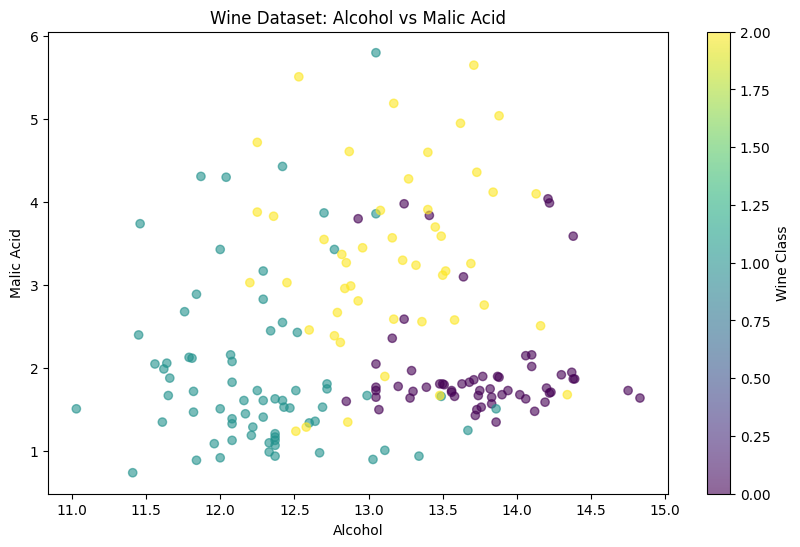

In [ ]:
# Scatter plot of Alcohol vs Malic Acid
plt.figure(figsize=(10, 6))
plt.scatter(wine['alcohol'], wine['malic_acid'], c=wine['target'], cmap='viridis', alpha=0.6)
plt.title('Wine Dataset: Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.colorbar(label='Wine Class')
#plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\Wine\Wine_Scatter_Plot.png")
plt.show()


In [ ]:
X = wine.drop(columns=['target','target_names'])
y = wine['target']  
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_13288\2459103518.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


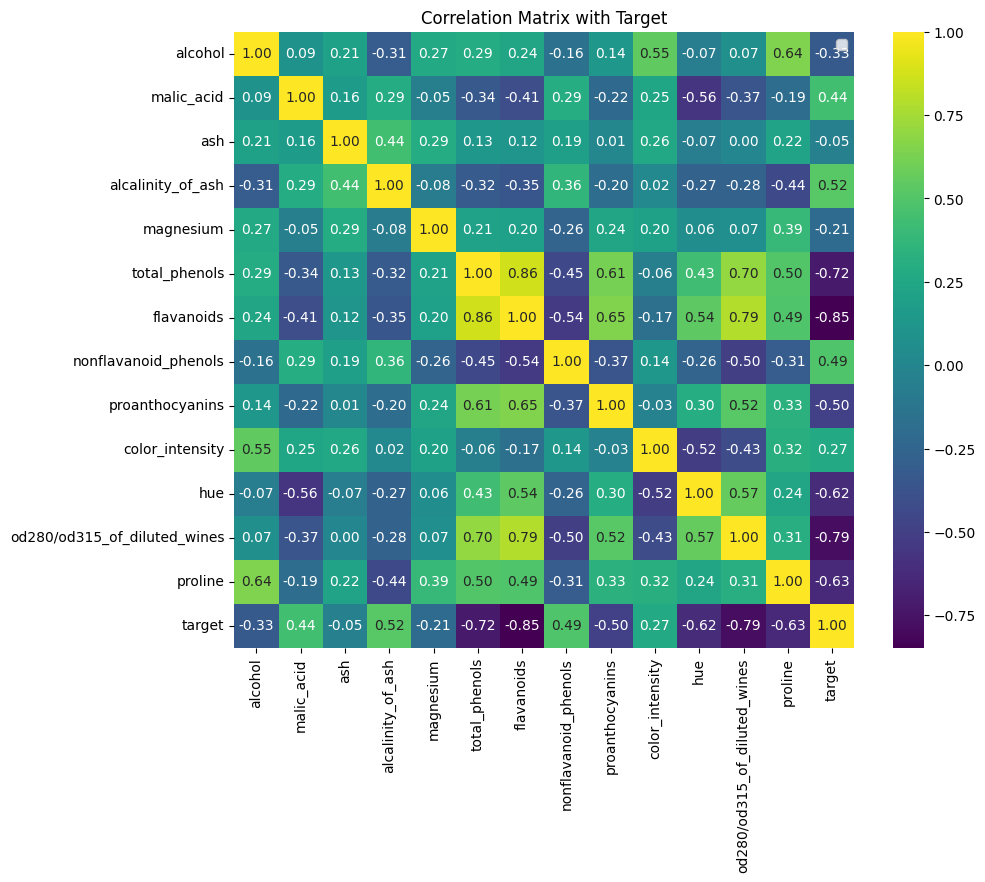

In [24]:
plt.figure(figsize=(10, 8))
corr_matrix = X.join(y).corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix with Target")
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\Wine\Wine_Correlation_Matrix.png")
plt.legend(loc='upper right')
plt.show()

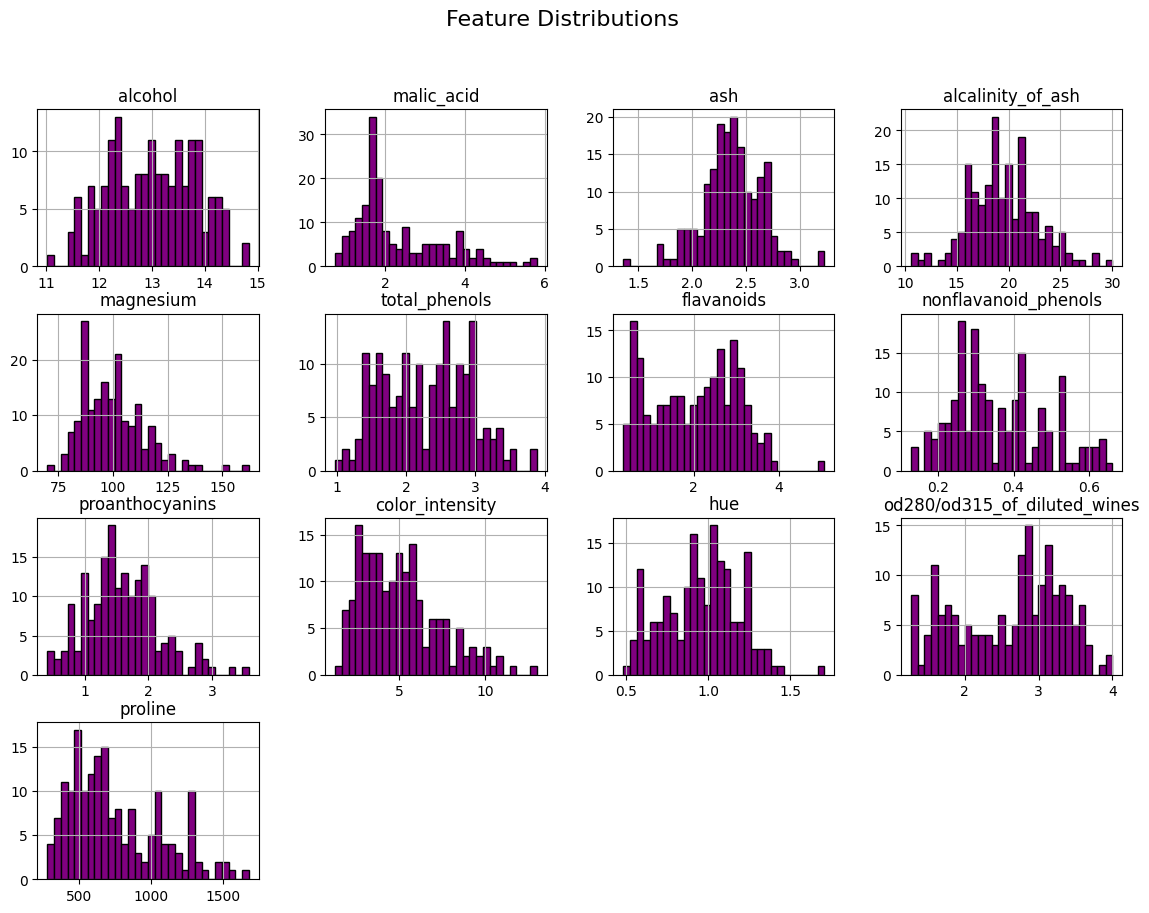

In [23]:
X.hist(bins=30, figsize=(14, 10), color='purple', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\Wine\Wine_Feature_Distributions.png")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()       
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

K-Means Clustering

In [46]:

def plot_clusters(name,X, labels, title):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=60)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\Wine\{name}.png")
    plt.legend(title="Cluster")
    plt.show()



In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


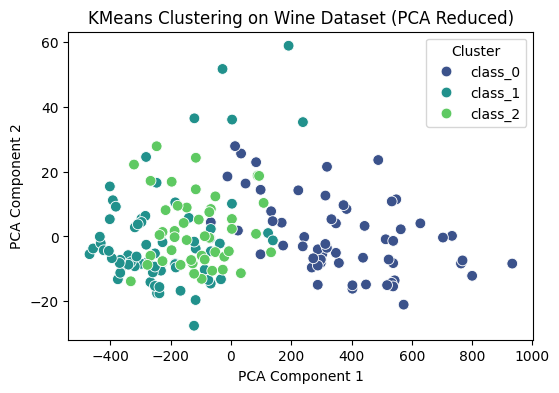

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
plot_clusters("Kmeans",X_pca, wine['target_names'], "KMeans Clustering on Wine Dataset (PCA Reduced)")

DecisionTreeRegressor


In [49]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train) 
from sklearn.metrics import mean_squared_error, r2_score
y_pred = dt.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Decision Tree MSE: {mse:.2f}")
print(f"Decision Tree R^2: {r2:.2f}")


Decision Tree MSE: 0.17
Decision Tree R^2: 0.71
